# Importing Data and cleaning

The data is collected from kaggle site but originally it was provided by UK traffic governemnt website. The data consists of traffic accidents from 2005 to 2015. There are three files accidents, casualties and vehicles. All the data is converted into numerical data type to ease the analytics process. 

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
%config InlineBackend.figure_format = 'retina'


In [2]:
accidents = pd.read_csv('Accidents0515.csv',index_col='Accident_Index')

In [3]:
casualties=pd.read_csv('Casualties0515.csv' , error_bad_lines=False,index_col='Accident_Index')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
vehicles=pd.read_csv('Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Identifying Missing Values
In this particular data has two types missing values such as '-1' and 'Nan'. There are couple columns missing lots of values. Those columns with missing lots of values will be dropped. Also, there are some columns that are related to Longitude and Latitude and will be better to drop them.

In [4]:
for col in accidents.columns:
    x = ((accidents[col]==-1).sum())
    print(col ,' ' , x)

Location_Easting_OSGR   0
Location_Northing_OSGR   0
Longitude   1
Latitude   0
Police_Force   0
Accident_Severity   0
Number_of_Vehicles   0
Number_of_Casualties   0
Date   0
Day_of_Week   0
Time   0
Local_Authority_(District)   0
Local_Authority_(Highway)   0
1st_Road_Class   0
1st_Road_Number   2
Road_Type   0
Speed_limit   0
Junction_Detail   19
Junction_Control   641392
2nd_Road_Class   732871
2nd_Road_Number   16823
Pedestrian_Crossing-Human_Control   161
Pedestrian_Crossing-Physical_Facilities   164
Light_Conditions   0
Weather_Conditions   161
Road_Surface_Conditions   2439
Special_Conditions_at_Site   124
Carriageway_Hazards   127
Urban_or_Rural_Area   0
Did_Police_Officer_Attend_Scene_of_Accident   278
LSOA_of_Accident_Location   0


In [5]:
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location','Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True)

In [6]:
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']

In [ ]:
x = accidents[accidents.Date_time.dt.hour==15]
x = x[x.Date_time.dt.year==2015]
x.shape

In [7]:
accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)

In [ ]:
accidents.shape

In [8]:
for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)


In [9]:
for col in accidents.columns:
    x = ((accidents[col]==-1).sum())
    print(col ,' ' , x)

Longitude   0
Latitude   0
Police_Force   0
Accident_Severity   0
Number_of_Vehicles   0
Number_of_Casualties   0
Day_of_Week   0
Local_Authority_(District)   0
Local_Authority_(Highway)   0
1st_Road_Class   0
1st_Road_Number   0
Road_Type   0
Speed_limit   0
Junction_Detail   0
2nd_Road_Number   0
Pedestrian_Crossing-Human_Control   0
Pedestrian_Crossing-Physical_Facilities   0
Light_Conditions   0
Weather_Conditions   0
Road_Surface_Conditions   0
Special_Conditions_at_Site   0
Carriageway_Hazards   0
Urban_or_Rural_Area   0
Did_Police_Officer_Attend_Scene_of_Accident   0
Date_time   0


(1760810, 25)

In [ ]:
accidents.shape

# Data Visualization

Text(0.5,1,'Accidents on the day of a week')

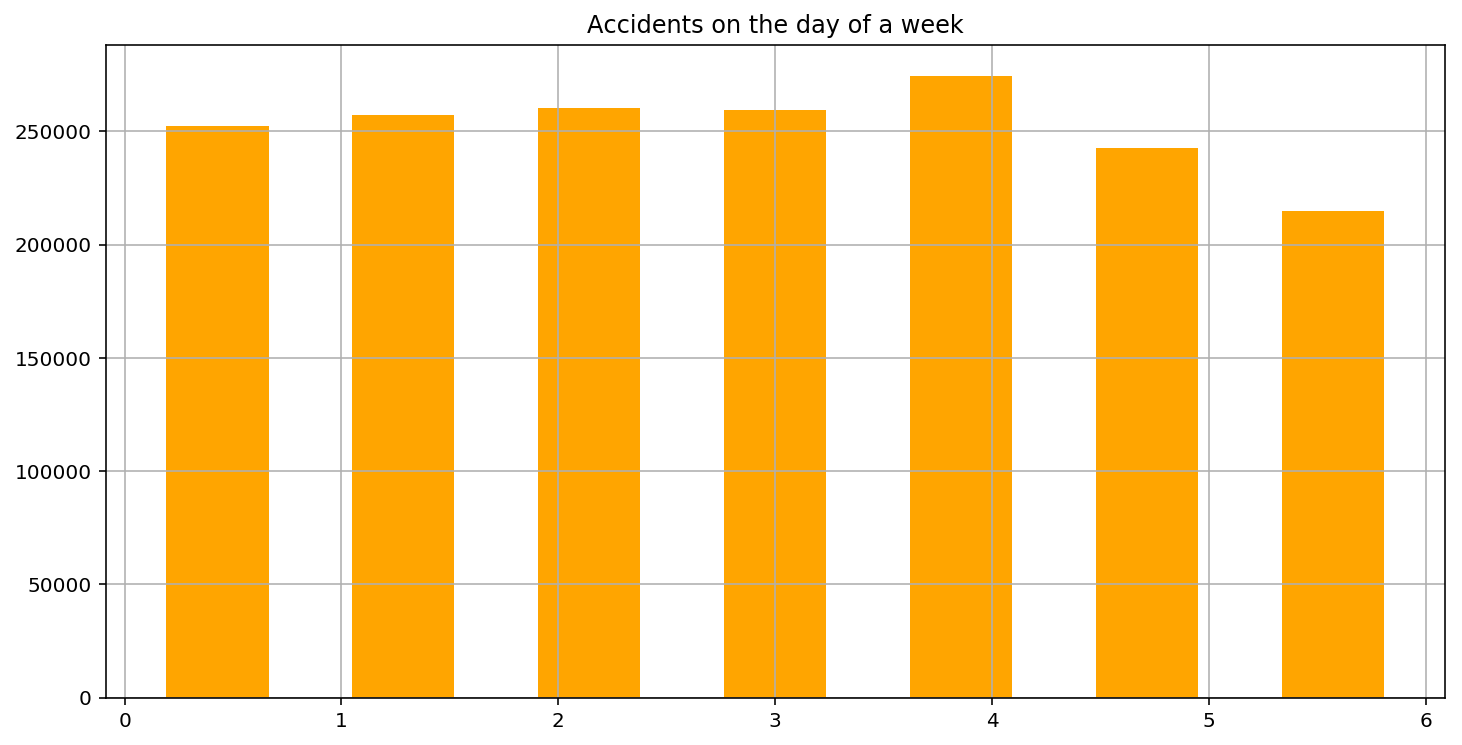

In [24]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55 , color= 'orange')
plt.title('Accidents on the day of a week')

Text(0.5,1,'Accidents time')

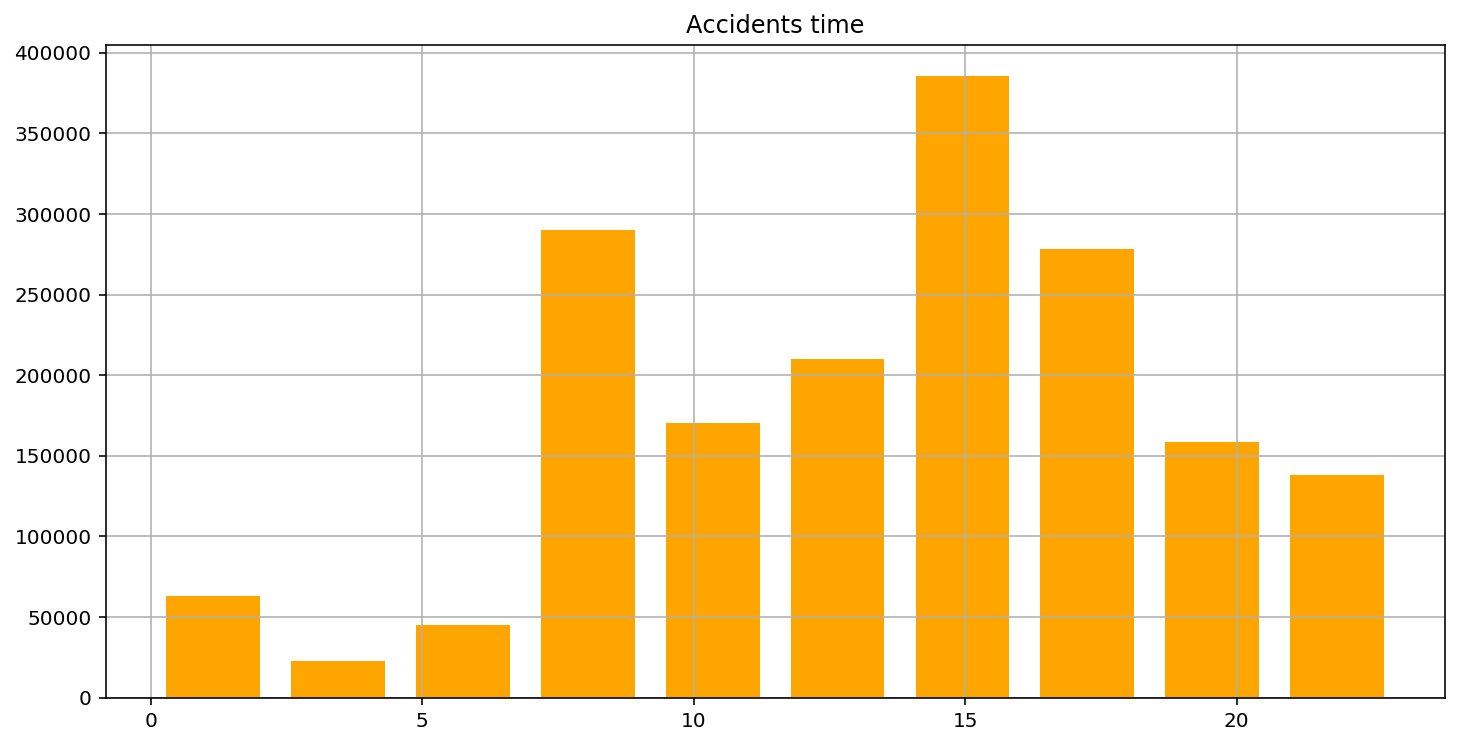

In [25]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75 , color= 'orange')
plt.title('Accidents time')

In [ ]:
casualties.Age_of_Casualty.hi

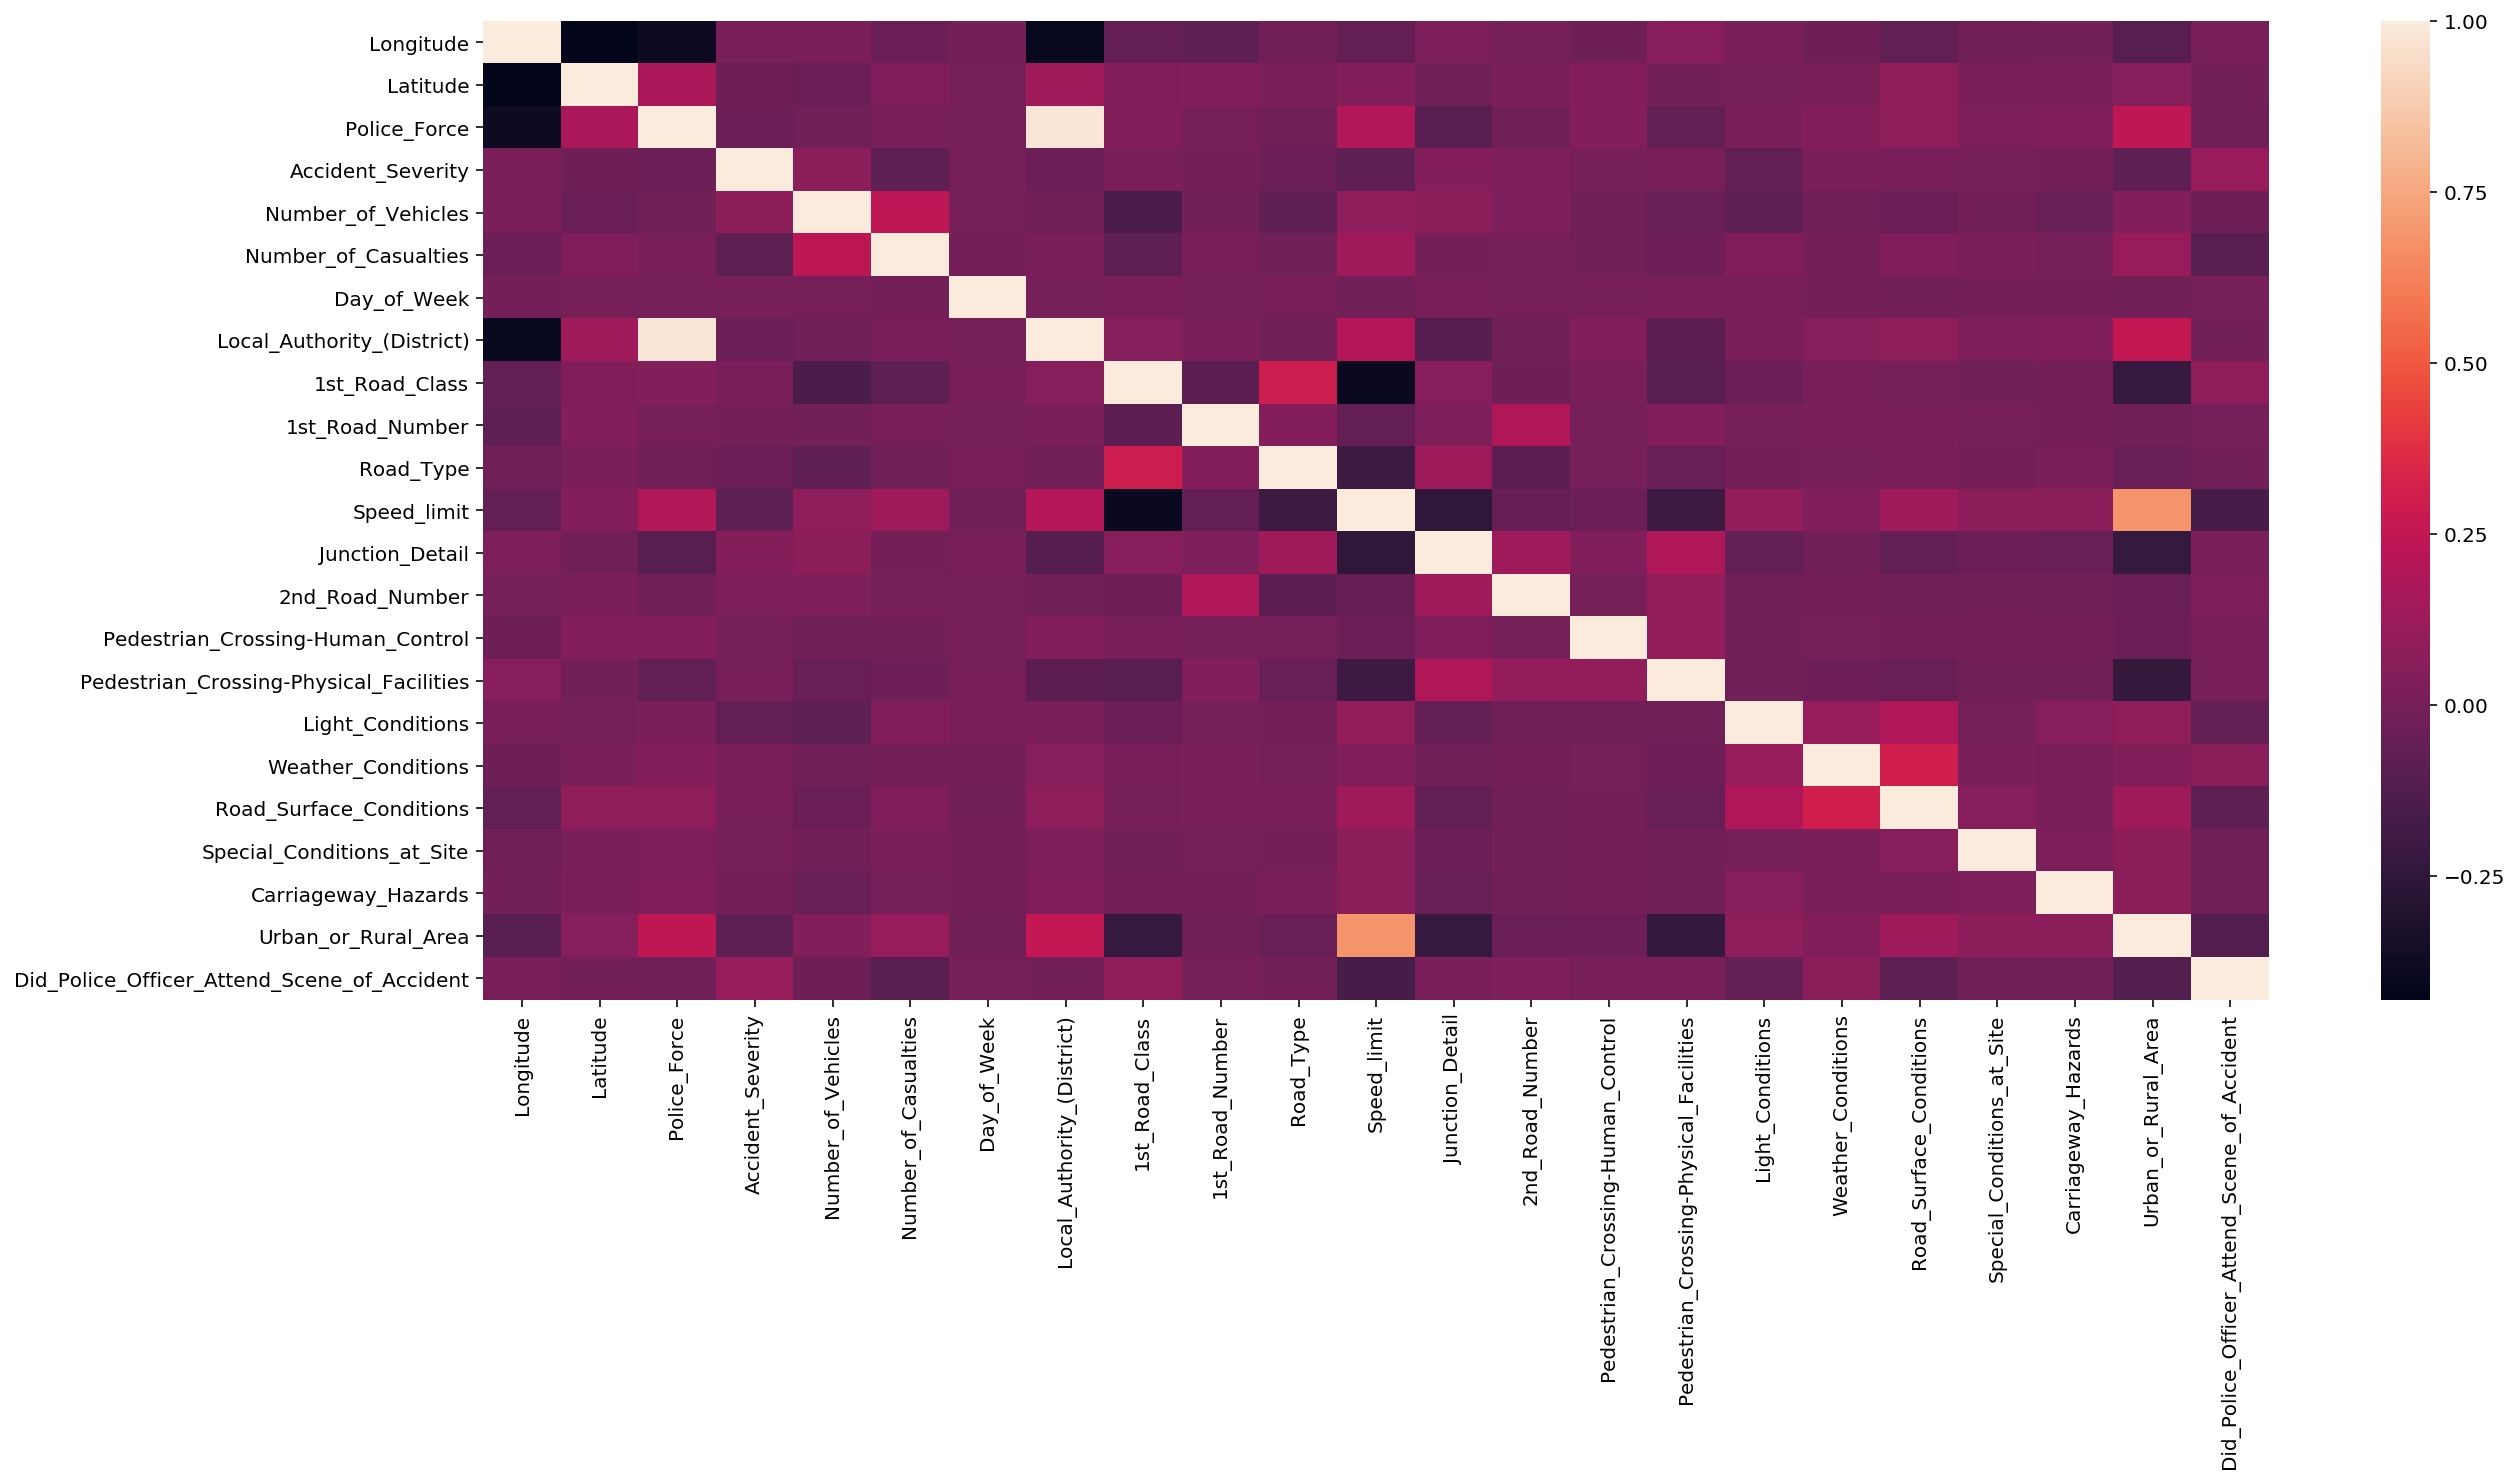

In [26]:
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

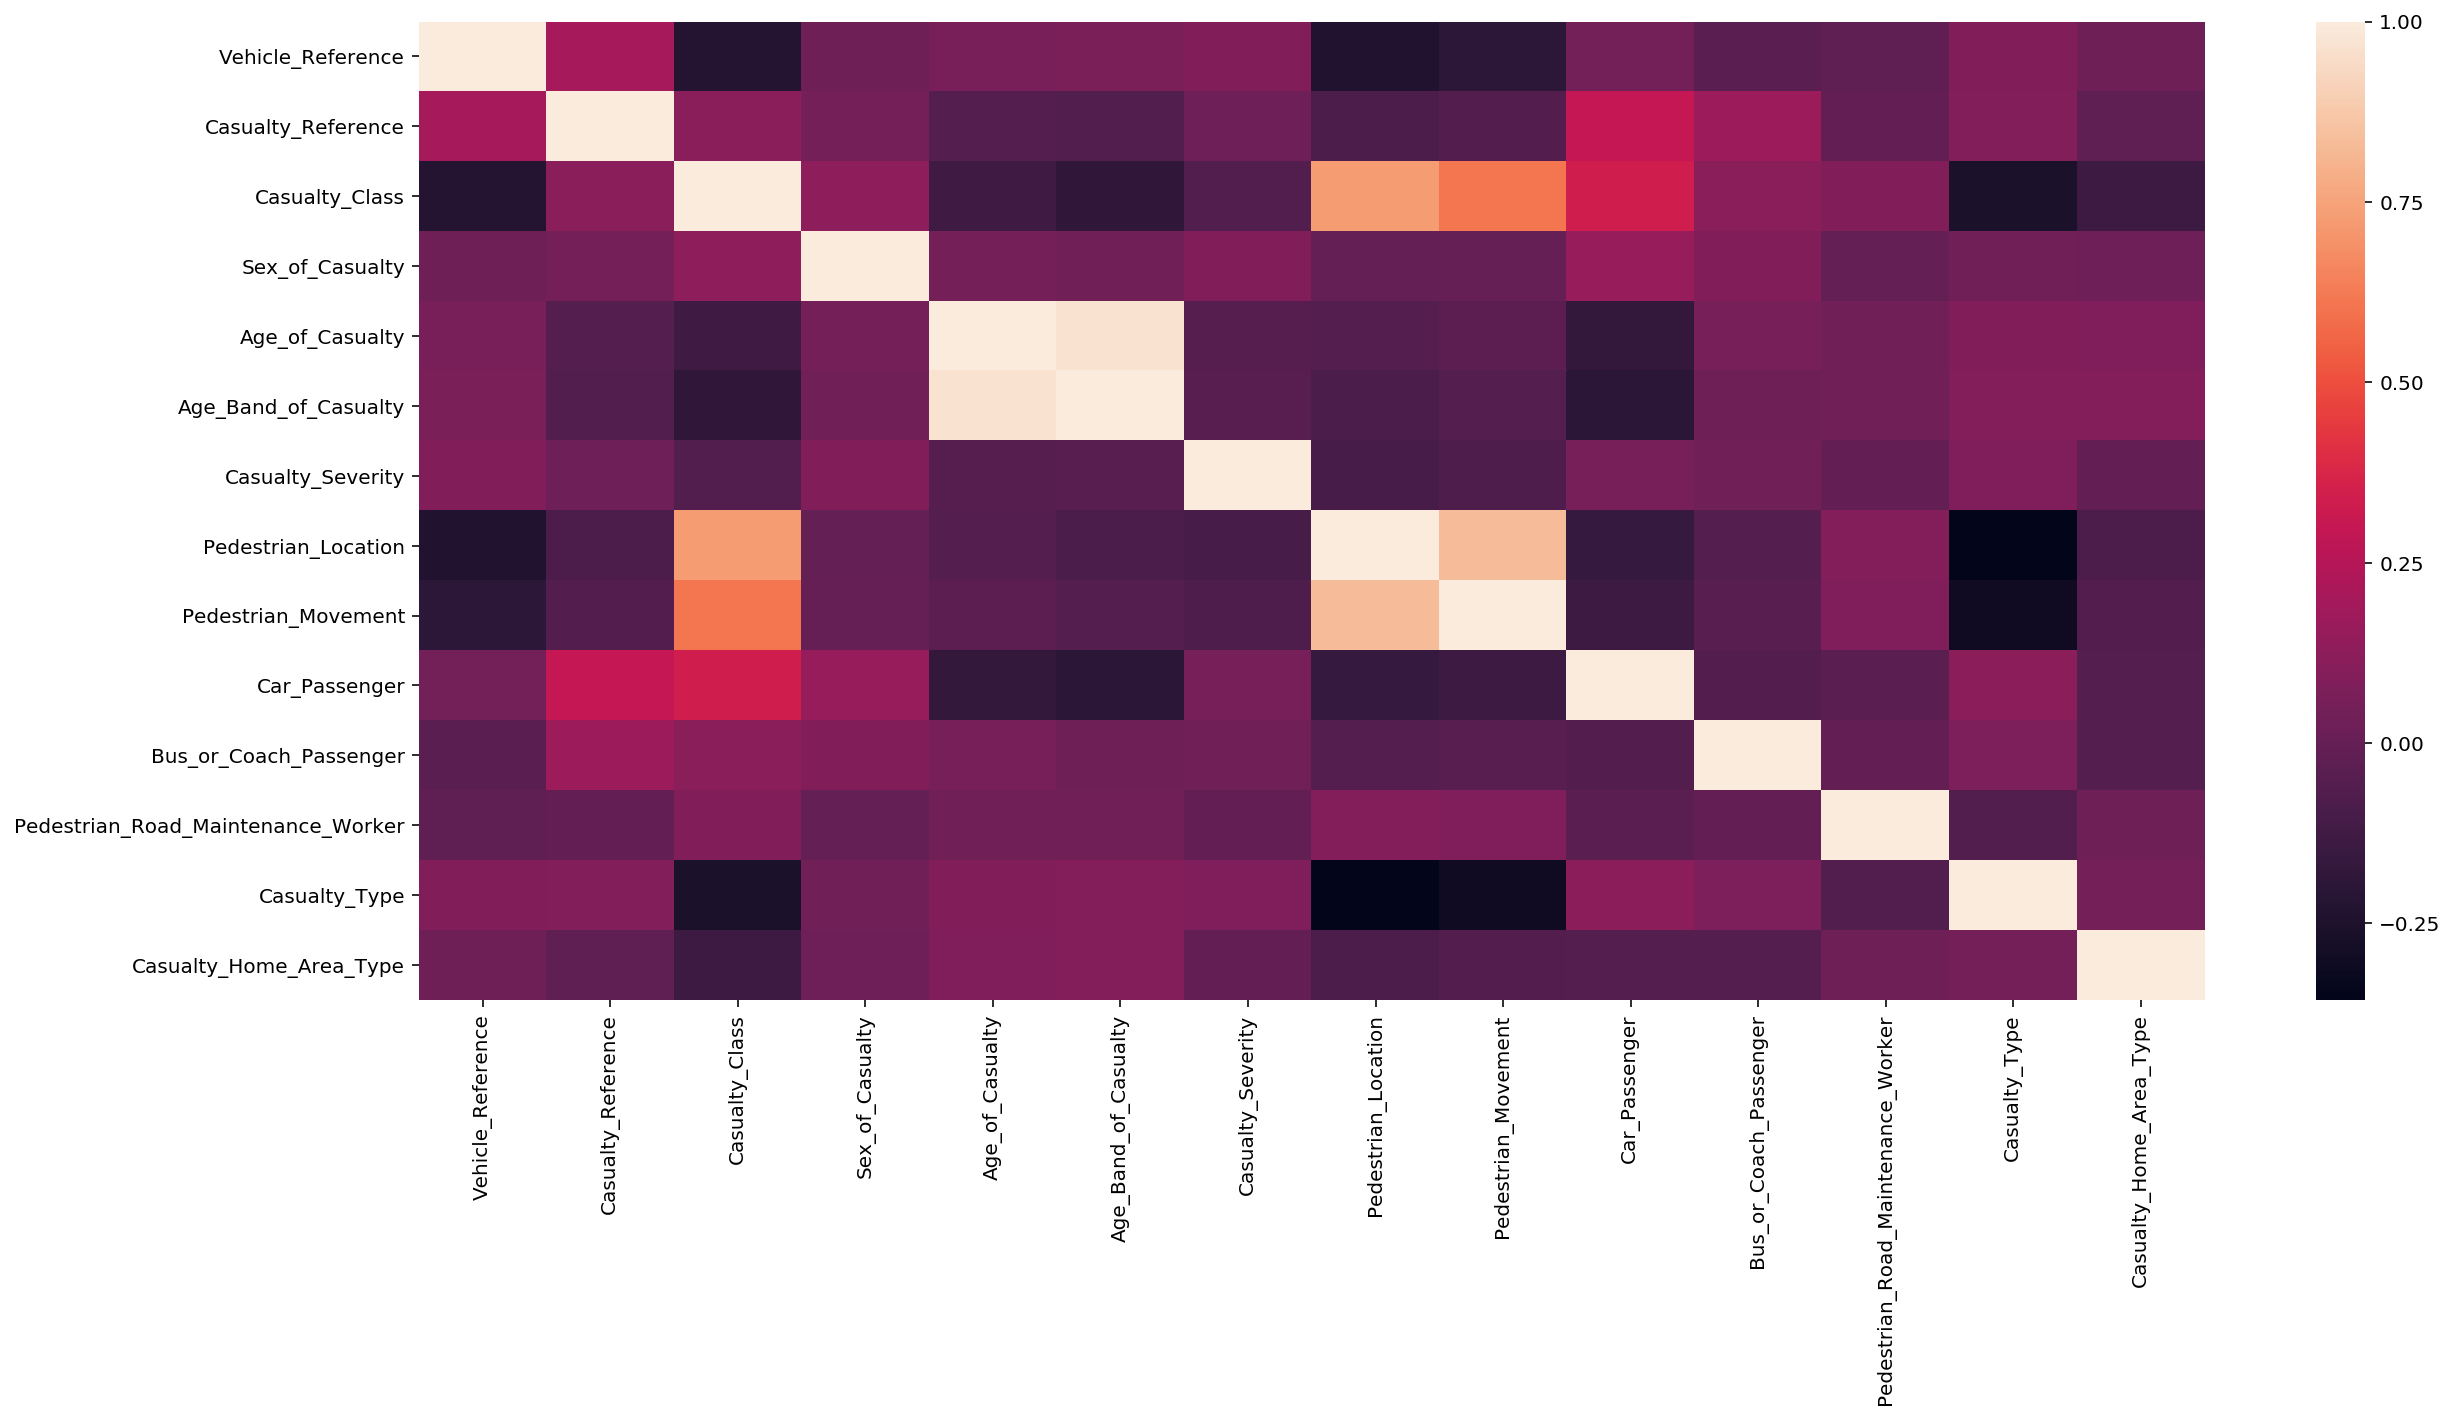

In [27]:
corr = casualties.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

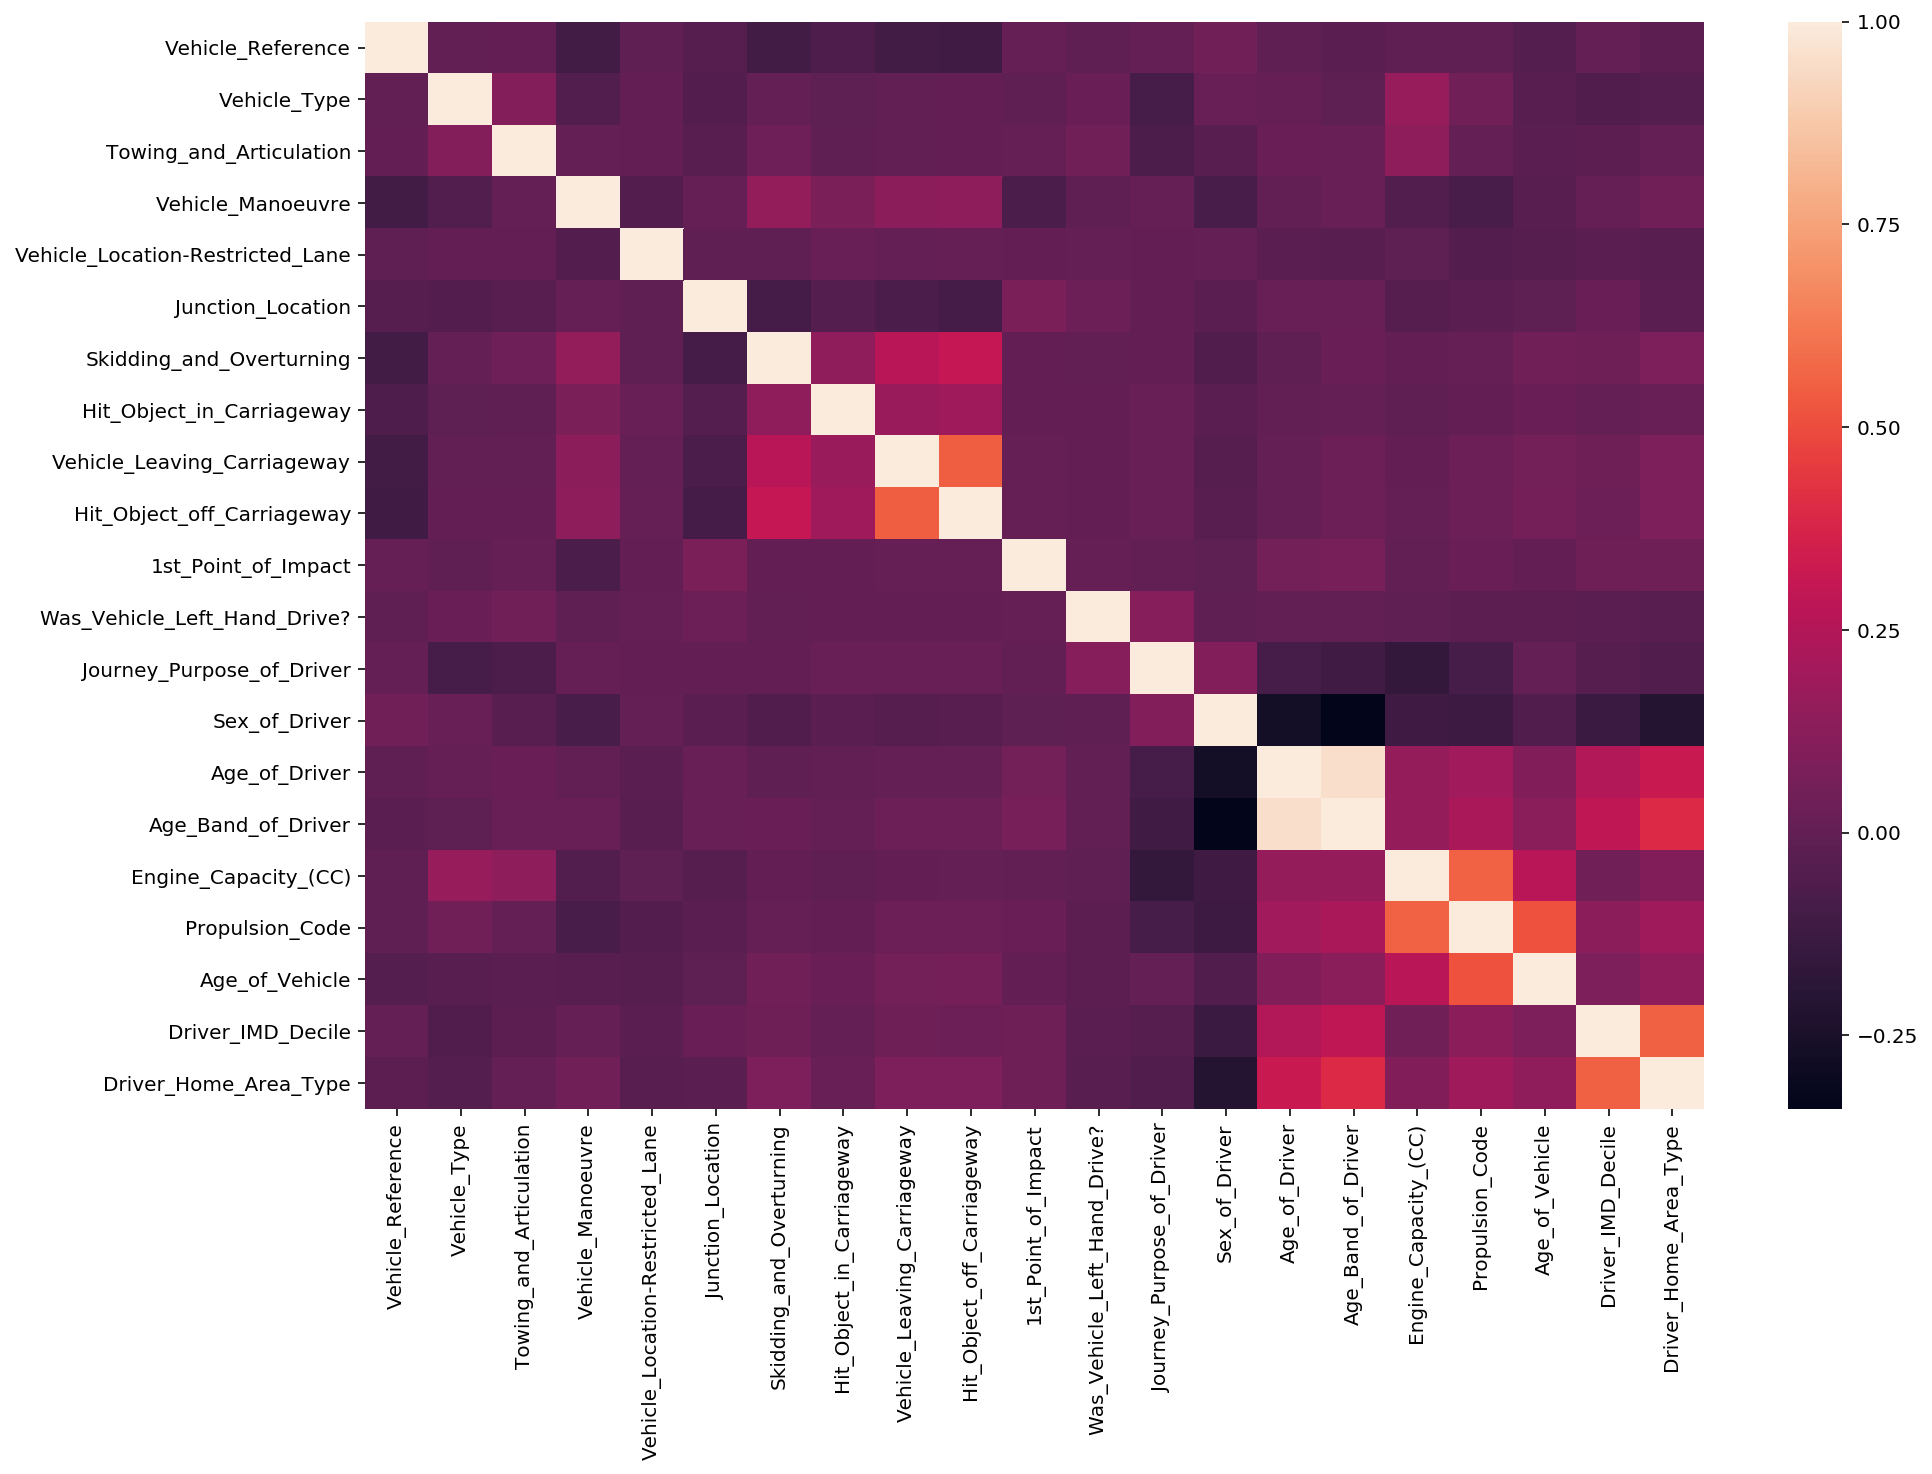

In [30]:
corr =  vehicles.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr)

# Training and Testing data
Splitting the data as 80% for training and 20% for testing


In [ ]:
rows = accidents.shape[0]
rows =  int(rows*0.8)
train_data = accidents[:rows]
test_data = accidents[rows:]